# Set Up

## Load Necessary Libraries

In [27]:
# importing of modules for CIFAR-10 CNN 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils, callbacks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
# importing of service libraries
import numpy as np
import matplotlib.pyplot as plt

print('Libraries imported.')

Libraries imported.


## Define Training Constants

In [4]:
#training constants
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2

print('Main variables initialised.')

Main variables initialised.


In [6]:

IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')

Image variables initialisation


## CIFAR-10 data loading and processing

In [7]:
#load dataset
(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar10.load_data()
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')
 
# convert to categorical
output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES) 

# float and normalization
input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255

input_X_train, input_X_validation, output_Y_train, output_Y_validation = train_test_split(
    input_X_train, output_Y_train, test_size=0.20, random_state=42)

print('input_X_train shape after split:', input_X_train.shape)
print('input_X_validation shape:', input_X_validation.shape)

input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
input_X_train shape after split: (40000, 32, 32, 3)
input_X_validation shape: (10000, 32, 32, 3)


# Experiment 1


In [8]:
dropouts = [0.2, 0.5]
batch_sizes = [32,64,128]
learning_rates = [0.0001, 0.001, 0.01]
N_EPOCH = 50 




results = []
callback1 = callbacks.ModelCheckpoint(
    'experiment1_best_model.h5',
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="auto",
    save_freq="epoch"
)

callback2 = callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)

count = 0
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        datagen = ImageDataGenerator(
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
        train_generator = datagen.flow(input_X_train, output_Y_train, batch_size=batch_size)
        for dropout in dropouts:
            

            model = Sequential()
            
            model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
            model.add(Activation('relu'))
            model.add(Conv2D(32, kernel_size=3, padding='same'))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout(dropout))
            
            model.add(Conv2D(64, kernel_size=3, padding='same'))
            model.add(Activation('relu'))
            model.add(Conv2D(64, 3, 3))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))
            model.add(Dropout(dropout))
            
            model.add(Flatten())
            model.add(Dense(512))
            model.add(Activation('relu'))
            model.add(Dropout(dropout))
            model.add(Dense(N_CLASSES))
            model.add(Activation('softmax'))

            optim = Adam(learning_rate=learning_rate)
            model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
            history = model.fit(train_generator, steps_per_epoch=input_X_train.shape[0]//batch_size, validation_data=(input_X_validation, output_Y_validation), epochs=N_EPOCH,   verbose=VERBOSE, callbacks =[callback1, callback2])

            score = model.evaluate(input_X_validation, output_Y_validation, batch_size=batch_size, verbose=VERBOSE)
            print("\nFinal validation score/loss:", score[0])
            print('Final validation accuracy:', score[1])
            
            results.append({'learning_rate': learning_rate, 'batch size': batch_size, 'dropout': dropout, 'score': score, 'history': history})
            count+=1
            print("Completed: " + str(count) + " models")



Epoch 1/50


1249/1250 [============================>.] - ETA: 0s - loss: 2.0327 - accuracy: 0.2361
Epoch 1: val_accuracy improved from -inf to 0.31510, saving model to experiment1_best_model.h5
1250/1250 [==============================] - 18s 14ms/step - loss: 2.0326 - accuracy: 0.2361 - val_loss: 1.8382 - val_accuracy: 0.3151
Epoch 2/50
   9/1250 [..............................] - ETA: 16s - loss: 1.8459 - accuracy: 0.3229

c:\Users\raf80\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - ETA: 0s - loss: 1.8214 - accuracy: 0.3182
Epoch 2: val_accuracy improved from 0.31510 to 0.38680, saving model to experiment1_best_model.h5
1250/1250 [==============================] - 18s 14ms/step - loss: 1.8214 - accuracy: 0.3182 - val_loss: 1.6517 - val_accuracy: 0.3868
Epoch 3/50
1248/1250 [============================>.] - ETA: 0s - loss: 1.7460 - accuracy: 0.3495
Epoch 3: val_accuracy improved from 0.38680 to 0.41710, saving model to experiment1_best_model.h5
1250/1250 [==============================] - 19s 15ms/step - loss: 1.7459 - accuracy: 0.3496 - val_loss: 1.5621 - val_accuracy: 0.4171
Epoch 4/50
1249/1250 [============================>.] - ETA: 0s - loss: 1.6973 - accuracy: 0.3722
Epoch 4: val_accuracy improved from 0.41710 to 0.44170, saving model to experiment1_best_model.h5
1250/1250 [==============================] - 19s 15ms/step - loss: 1.6972 - accuracy: 0.3722 - val_loss: 1.5249 - val_accuracy: 0.4417
Epoch 5/50
1248/12

In [9]:
print(results)

[{'learning_rate': 0.0001, 'batch size': 32, 'dropout': 0.2, 'score': [0.9267525672912598, 0.6682999730110168], 'history': <keras.src.callbacks.History object at 0x000001CC157DC190>}, {'learning_rate': 0.0001, 'batch size': 32, 'dropout': 0.5, 'score': [1.1913155317306519, 0.5687999725341797], 'history': <keras.src.callbacks.History object at 0x000001CC157F2440>}, {'learning_rate': 0.0001, 'batch size': 64, 'dropout': 0.2, 'score': [1.0626128911972046, 0.6244999766349792], 'history': <keras.src.callbacks.History object at 0x000001CC15E2FAF0>}, {'learning_rate': 0.0001, 'batch size': 64, 'dropout': 0.5, 'score': [1.2513937950134277, 0.5435000061988831], 'history': <keras.src.callbacks.History object at 0x000001CC15C85150>}, {'learning_rate': 0.0001, 'batch size': 128, 'dropout': 0.2, 'score': [1.203792929649353, 0.5776000022888184], 'history': <keras.src.callbacks.History object at 0x000001CC18207F40>}, {'learning_rate': 0.0001, 'batch size': 128, 'dropout': 0.5, 'score': [1.32829773426

In [14]:
best_val_accuracy = float('-inf')
history = None


for result in results:
    score = result['score']
    val_accuracy = score[1]
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        history = result['history']

print(best_val_accuracy)

0.714900016784668


## Visualise Results and Evaluate on Test Set

79/79 [==============================] - 1s 9ms/step - loss: 0.7870 - accuracy: 0.7291

Test score/loss: 0.7870180606842041
Test accuracy: 0.7290999889373779
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


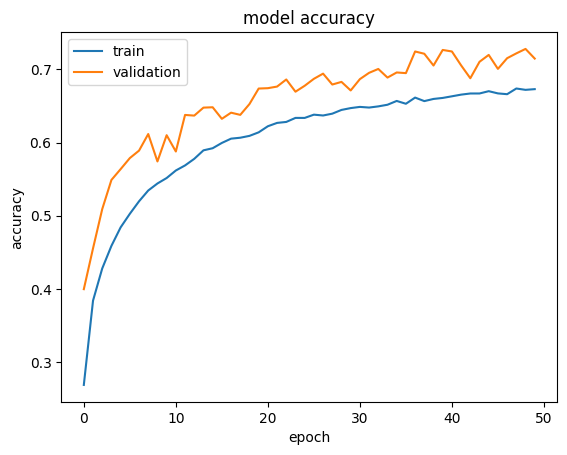

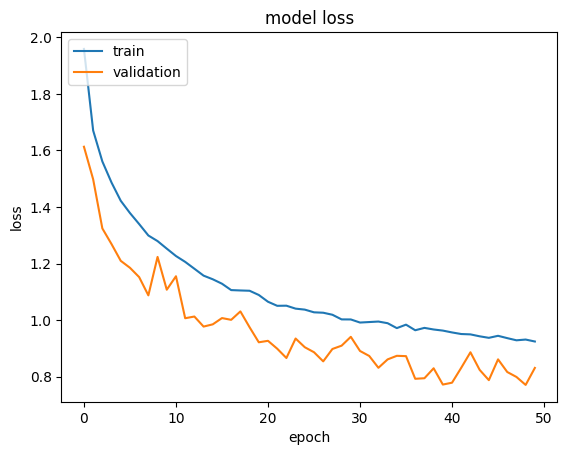

In [16]:

from tensorflow.keras.models import load_model


model = load_model('experiment1_best_model.h5')
score = model.evaluate(input_X_test, output_Y_test, batch_size=128, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])


print(history.history.keys())


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('best model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Experiment 2

## Create function for getting models of different depth

In [19]:
def getModel(depth, dropout, learning_rate):
    if depth == 3:
        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
        model.add(Activation('relu'))
        model.add(Conv2D(32, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))

        model.add(Conv2D(64, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(Conv2D(64, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))

        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(N_CLASSES))
        model.add(Activation('softmax'))

        optim = Adam(learning_rate=learning_rate)
        model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
        return model
    
    elif depth == 4:
        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
        model.add(Activation('relu'))
        model.add(Conv2D(32, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))

        model.add(Conv2D(64, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(Conv2D(64, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Conv2D(128, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
        model.add(Activation('relu'))
        model.add(Conv2D(128, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))

        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(N_CLASSES))
        model.add(Activation('softmax'))

        optim = Adam(learning_rate=learning_rate)
        model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
        return model
    
    elif depth == 5:
        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
        model.add(Activation('relu'))
        model.add(Conv2D(32, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))

        model.add(Conv2D(64, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(Conv2D(64, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Conv2D(128, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
        model.add(Activation('relu'))
        model.add(Conv2D(128, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))
        
        model.add(Conv2D(256, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
        model.add(Activation('relu'))
        model.add(Conv2D(256, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))

        model.add(Flatten())
        model.add(Dense(512))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(N_CLASSES))
        model.add(Activation('softmax'))

        optim = Adam(learning_rate=learning_rate)
        model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
        return model

## Training Models

In [20]:
depth_values = [3,4,5]
batch_sizes = [32,64,128]
learning_rate = 0.001
dropout = 0.2
N_EPOCH = 50 




results_experiment2 = []
callback1 = callbacks.ModelCheckpoint(
    'experiment2_best_model.h5',
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="auto",
    save_freq="epoch"
)

callback2 = callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)

count = 0

for batch_size in batch_sizes:
    datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
    train_generator = datagen.flow(input_X_train, output_Y_train, batch_size=batch_size)
    for depth in depth_values:
        

        model = getModel(depth=depth, dropout=dropout, learning_rate=learning_rate)
        history = model.fit(train_generator, steps_per_epoch=input_X_train.shape[0]//batch_size, validation_data=(input_X_validation, output_Y_validation), epochs=N_EPOCH,   verbose=VERBOSE, callbacks =[callback1, callback2])
        score = model.evaluate(input_X_validation, output_Y_validation, batch_size=batch_size, verbose=VERBOSE)
        print("\nFinal validation score/loss:", score[0])
        print('Final validation accuracy:', score[1])
        
        results_experiment2.append({'batch size': batch_size, 'depth': depth, 'score': score, 'history': history})
        count+=1
        print("Completed: " + str(count) + " models")

Epoch 1/50
1250/1250 [==============================] - ETA: 0s - loss: 1.7513 - accuracy: 0.3520
Epoch 1: val_accuracy improved from -inf to 0.48840, saving model to experiment2_best_model.h5
1250/1250 [==============================] - 38s 29ms/step - loss: 1.7513 - accuracy: 0.3520 - val_loss: 1.4199 - val_accuracy: 0.4884
Epoch 2/50
1249/1250 [============================>.] - ETA: 0s - loss: 1.4245 - accuracy: 0.4818
Epoch 2: val_accuracy improved from 0.48840 to 0.58060, saving model to experiment2_best_model.h5
1250/1250 [==============================] - 43s 34ms/step - loss: 1.4246 - accuracy: 0.4818 - val_loss: 1.1596 - val_accuracy: 0.5806
Epoch 3/50
1250/1250 [==============================] - ETA: 0s - loss: 1.2986 - accuracy: 0.5292
Epoch 3: val_accuracy improved from 0.58060 to 0.58150, saving model to experiment2_best_model.h5
1250/1250 [==============================] - 73s 59ms/step - loss: 1.2986 - accuracy: 0.5292 - val_loss: 1.1652 - val_accuracy: 0.5815
Epoch 4/50

In [41]:
print(results_experiment2)
histories_2 = []
for result in results_experiment2:
    history = result['history']
    histories_2.append(history)

print(histories_2)

[{'batch size': 32, 'depth': 3, 'score': [0.6667117476463318, 0.7757999897003174], 'history': <keras.src.callbacks.History object at 0x000001CCA291ECB0>}, {'batch size': 32, 'depth': 4, 'score': [0.7564975023269653, 0.7371000051498413], 'history': <keras.src.callbacks.History object at 0x000001CC0A758E20>}, {'batch size': 32, 'depth': 5, 'score': [0.8026278614997864, 0.7235999703407288], 'history': <keras.src.callbacks.History object at 0x000001CC803C5CC0>}, {'batch size': 64, 'depth': 3, 'score': [0.6017714142799377, 0.7990999817848206], 'history': <keras.src.callbacks.History object at 0x000001CCA41BE9B0>}, {'batch size': 64, 'depth': 4, 'score': [0.6278942227363586, 0.7865999937057495], 'history': <keras.src.callbacks.History object at 0x000001CCA42D6680>}, {'batch size': 64, 'depth': 5, 'score': [0.6832071542739868, 0.7639999985694885], 'history': <keras.src.callbacks.History object at 0x000001CCA44F5390>}, {'batch size': 128, 'depth': 3, 'score': [0.5931716561317444, 0.80040001869

## Visualise Results and Evaluate on Test Set

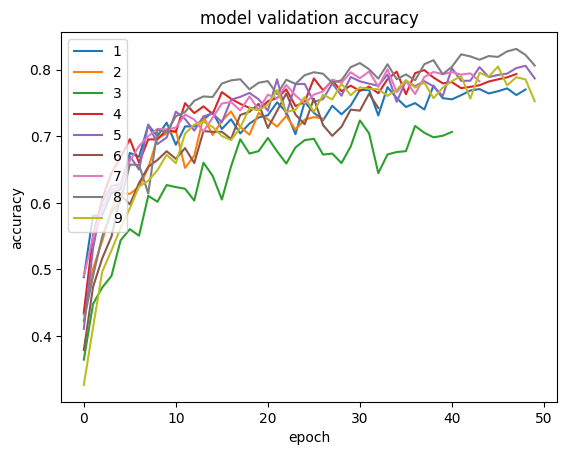

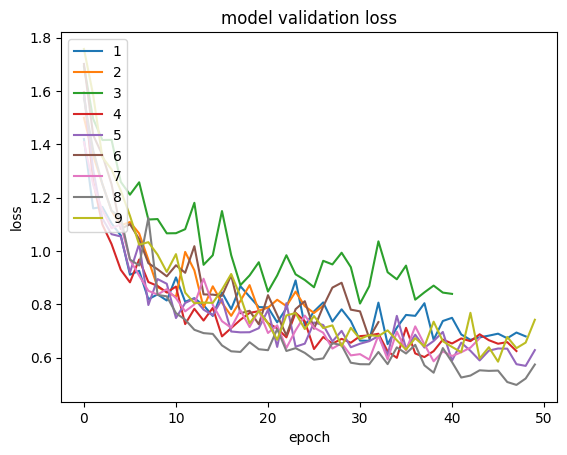

In [42]:


for history in histories_2:
    plt.plot(history.history['val_accuracy'])
    
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['1', '2', '3', '4', '5', '6', '7', '8', '9'], loc='upper left')
plt.show()


for history in histories_2:
    plt.plot(history.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['1', '2', '3', '4', '5', '6', '7', '8', '9'], loc='upper left')
plt.show()

In [22]:
best_val_accuracy = float('-inf')
history = None


for result in results_experiment2:
    score = result['score']
    val_accuracy = score[1]
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        history = result['history']

print(best_val_accuracy)

0.8059999942779541


79/79 [==============================] - 2s 19ms/step - loss: 0.5238 - accuracy: 0.8223

Test score/loss: 0.5237636566162109
Test accuracy: 0.8223000168800354
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


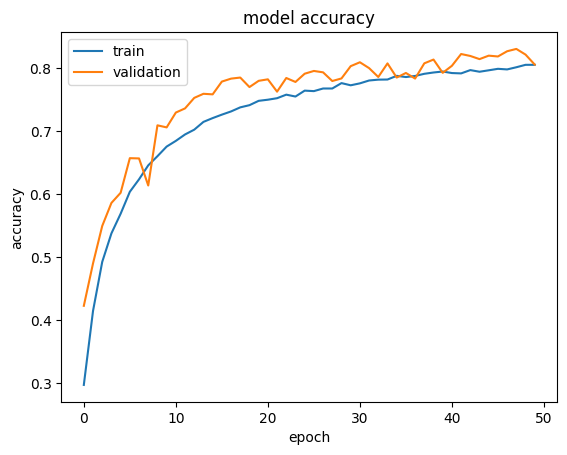

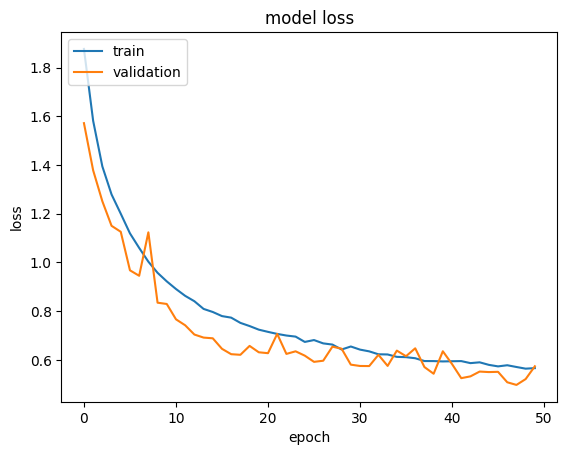

In [24]:

model = load_model('experiment2_best_model.h5')
score = model.evaluate(input_X_test, output_Y_test, batch_size=128, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])


print(history.history.keys())


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Experiment 3

## Create function for creating models of different depth

In [30]:
def getModel(depth, dropout, learning_rate, neuron_value):
    if depth == 3:
        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Conv2D(32, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))

        model.add(Conv2D(64, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Conv2D(64, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))

        model.add(Flatten())
        model.add(Dense(neuron_value))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(N_CLASSES))
        model.add(Activation('softmax'))

        optim = Adam(learning_rate=learning_rate)
        model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
        return model
    
    elif depth == 4:
        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Conv2D(32, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))

        model.add(Conv2D(64, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Conv2D(64, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))

        model.add(Conv2D(128, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Conv2D(128, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))

        model.add(Flatten())
        model.add(Dense(neuron_value))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(N_CLASSES))
        model.add(Activation('softmax'))

        optim = Adam(learning_rate=learning_rate)
        model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
        return model
    
    elif depth == 5:


        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Conv2D(32, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))

        model.add(Conv2D(64, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Conv2D(64, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))

        model.add(Conv2D(128, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Conv2D(128, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))

        model.add(Conv2D(256, kernel_size=3, padding='same', input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Conv2D(256, kernel_size=3, padding='same'))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(dropout))


        model.add(Flatten())
        model.add(Dense(neuron_value))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))
        model.add(Dense(N_CLASSES))
        model.add(Activation('softmax'))

        optim = Adam(learning_rate=learning_rate)
        model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
        return model

## Model Training

In [36]:
dropout = 0.2
batch_size = 128
learning_rate = 0.001
depth_values = [3, 4, 5]
neuron_values = [512, 1024]

N_EPOCH = 50 




results_experiment3 = []
callback1 = callbacks.ModelCheckpoint(
    'experiment3_best_model.h5',
    monitor="val_accuracy",
    verbose=1,
    save_best_only=True,
    mode="auto",
    save_freq="epoch"
)

callback2 = callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, verbose=1)

count = 0

datagen = ImageDataGenerator(
width_shift_range=0.2,
height_shift_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
train_generator = datagen.flow(input_X_train, output_Y_train, batch_size=batch_size)

for depth in depth_values:
    for neuron_value in neuron_values:
        model = getModel(depth=depth, dropout=dropout, learning_rate=learning_rate, neuron_value=neuron_value)
        history = model.fit(train_generator, steps_per_epoch=input_X_train.shape[0]//batch_size, validation_data=(input_X_validation, output_Y_validation), epochs=N_EPOCH,   verbose=VERBOSE, callbacks =[callback1, callback2])
        score = model.evaluate(input_X_validation, output_Y_validation, batch_size=batch_size, verbose=VERBOSE)
        print("\nFinal validation score/loss:", score[0])
        print('Final validation accuracy:', score[1])

        results_experiment3.append({'learning_rate': learning_rate, 'batch size': batch_size, 'dropout': dropout, 'score': score, 'history': history})
        count+=1
        print("Completed: " + str(count) + " models")

Epoch 1/50
312/312 [==============================] - ETA: 0s - loss: 1.7961 - accuracy: 0.3817
Epoch 1: val_accuracy improved from -inf to 0.12720, saving model to experiment3_best_model.h5
312/312 [==============================] - 24s 76ms/step - loss: 1.7961 - accuracy: 0.3817 - val_loss: 3.8635 - val_accuracy: 0.1272
Epoch 2/50
312/312 [==============================] - ETA: 0s - loss: 1.4227 - accuracy: 0.4841
Epoch 2: val_accuracy improved from 0.12720 to 0.51030, saving model to experiment3_best_model.h5
312/312 [==============================] - 23s 75ms/step - loss: 1.4227 - accuracy: 0.4841 - val_loss: 1.3926 - val_accuracy: 0.5103
Epoch 3/50
312/312 [==============================] - ETA: 0s - loss: 1.2668 - accuracy: 0.5451
Epoch 3: val_accuracy improved from 0.51030 to 0.59530, saving model to experiment3_best_model.h5
312/312 [==============================] - 25s 80ms/step - loss: 1.2668 - accuracy: 0.5451 - val_loss: 1.1457 - val_accuracy: 0.5953
Epoch 4/50
312/312 [==

In [43]:
print(results_experiment3)
histories_3 = []
for result in results_experiment3:
    history = result['history']
    histories_3.append(history)

print(histories_3)

[{'learning_rate': 0.001, 'batch size': 128, 'dropout': 0.2, 'score': [0.5321747064590454, 0.8238999843597412], 'history': <keras.src.callbacks.History object at 0x000001CC9AE37BB0>}, {'learning_rate': 0.001, 'batch size': 128, 'dropout': 0.2, 'score': [0.6029675602912903, 0.8025000095367432], 'history': <keras.src.callbacks.History object at 0x000001CC9ACA8910>}, {'learning_rate': 0.001, 'batch size': 128, 'dropout': 0.2, 'score': [0.44832664728164673, 0.8492000102996826], 'history': <keras.src.callbacks.History object at 0x000001CC9B14DF90>}, {'learning_rate': 0.001, 'batch size': 128, 'dropout': 0.2, 'score': [0.46456924080848694, 0.8471999764442444], 'history': <keras.src.callbacks.History object at 0x000001CC9C8A5F30>}, {'learning_rate': 0.001, 'batch size': 128, 'dropout': 0.2, 'score': [0.3933834731578827, 0.8747000098228455], 'history': <keras.src.callbacks.History object at 0x000001CC9D209B10>}, {'learning_rate': 0.001, 'batch size': 128, 'dropout': 0.2, 'score': [0.4268249571

## Visualise Results and Evaluate on Test Set

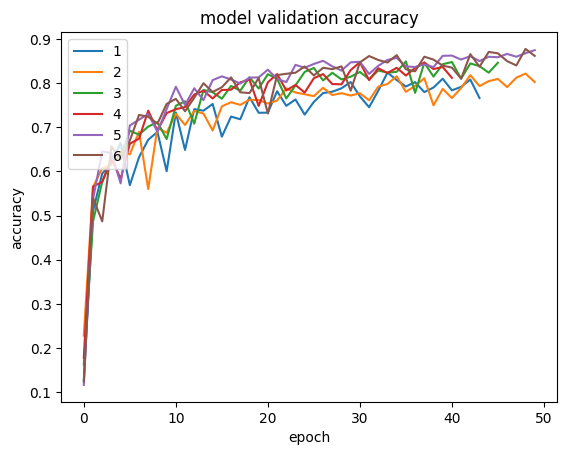

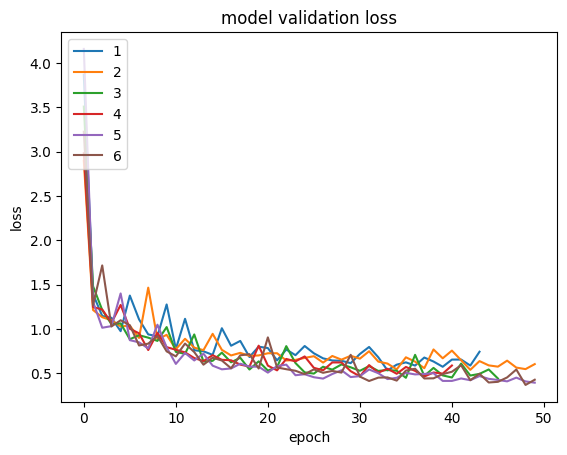

In [44]:

for history in histories_3:
    plt.plot(history.history['val_accuracy'])
    
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18'], loc='upper left')
plt.show()

for history in histories_3:
    plt.plot(history.history['val_loss'])
plt.title('model validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['1', '2', '3', '4', '5', '6'], loc='upper left')
plt.show()

In [38]:
best_val_accuracy = float('-inf')
history = None


for result in results_experiment3:
    score = result['score']
    val_accuracy = score[1]
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        history = result['history']

print(best_val_accuracy)

0.8747000098228455


79/79 [==============================] - 3s 38ms/step - loss: 0.4004 - accuracy: 0.8711

Test score/loss: 0.40039247274398804
Test accuracy: 0.8711000084877014
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


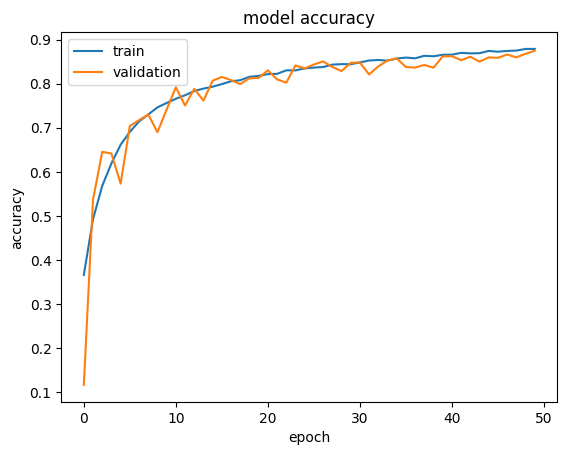

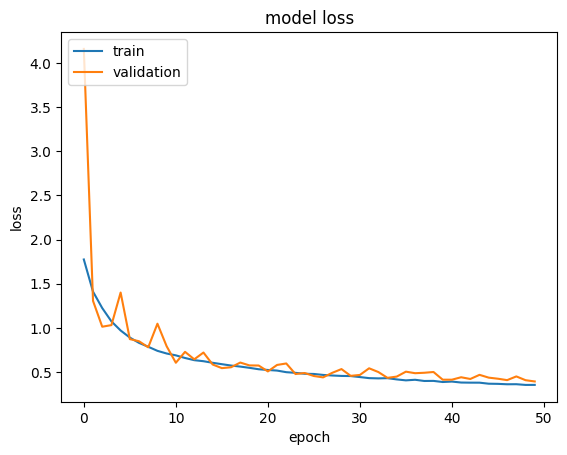

In [39]:

model = load_model('experiment3_best_model.h5')
score = model.evaluate(input_X_test, output_Y_test, batch_size=128, verbose=VERBOSE)
print("\nTest score/loss:", score[0])
print('Test accuracy:', score[1])


print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()